In [128]:
import pandas as pd
import numpy as np
import os
import glob
import warnings
warnings.simplefilter("ignore", UserWarning)

In [129]:
"""The purpose of this notebook is to evaluate the correlation of macroeconomic trends with US mass shootings"""

'The purpose of this notebook is to evaluate the correlation of macroeconomic trends with US mass shootings'

In [130]:
# credit for datasets:
# shootings data: https://www.kaggle.com/datasets/hemil26/mass-shootings-in-united-states-20182022?select=shootings_2019.csv
# econ data: https://www.kaggle.com/datasets/sarthmirashi07/us-macroeconomic-data/discussion 

In [131]:
# read in, analyze mass shootings dataset, join 2018-2022 
l = [pd.read_csv(filename, skiprows=0) for filename in glob.glob('data/*.csv')]
df_shootings = pd.concat(l, axis=0)
df_shootings.head()


,Date,State,Dead,Injured,Total,Description
0,29/12/2019,Texas,3,0,3,West Freeway Church of Christ shooting: Two pe...
1,29/12/2019,California,0,5,5,Five people were shot outside a home after ret...
2,29/12/2019,Illinois,0,5,5,Five women aged 18 to 32 years old were injure...
3,29/12/2019,New York,1,3,4,"After an argument escalated on a front porch, ..."
4,27/12/2019,Texas,2,7,9,Two people were killed and seven injured in a ...


In [132]:
# adjust dates to month only to join on macroecon data
df_shootings['Date'] = pd.to_datetime(df_shootings['Date']).dt.to_period('m')

# # converting to allow for plotting
df_shootings['Date'] = df_shootings['Date'].dt.to_timestamp()
df_shootings

,Date,State,Dead,Injured,Total,Description
0,2019-12-01,Texas,3,0,3,West Freeway Church of Christ shooting: Two pe...
1,2019-12-01,California,0,5,5,Five people were shot outside a home after ret...
2,2019-12-01,Illinois,0,5,5,Five women aged 18 to 32 years old were injure...
3,2019-12-01,New York,1,3,4,"After an argument escalated on a front porch, ..."
4,2019-12-01,Texas,2,7,9,Two people were killed and seven injured in a ...
...,...,...,...,...,...,...
279,2022-01-01,Georgia,1,3,4,After officers were dispatched to respond to a...
280,2022-01-01,Wisconsin,1,3,4,"A man was killed, and three others wounded, in..."
281,2022-01-01,Indiana,0,4,4,Four people were wounded at a shooting at a Ne...
282,2022-01-01,Colorado,2,2,4,"Two adults were killed, and two wounded, in an..."


In [133]:
df_econ = pd.read_csv('other-data/us_macro_economics.csv')
df_econ['date'] = pd.to_datetime(df_econ['date']).dt.to_period('m')

# normalize naming convention of date column (lowercase vs uppercase)
df_econ.rename(columns = {'date':'Date'}, inplace = True)

# converting to allow for plotting
df_econ['Date'] = df_econ['Date'].dt.to_timestamp()

df_econ

,Date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings
0,1980-11-01,85.600,14.2050,7.5,200.685556,4976.5,1826.8,11.6
1,1980-12-01,86.400,14.7900,7.2,198.398636,4999.8,1851.7,11.4
2,1981-01-01,87.200,14.9040,7.5,198.817619,4980.4,1870.0,10.9
3,1981-02-01,88.000,15.1325,7.4,194.852105,4965.0,1884.2,10.8
4,1981-03-01,88.600,15.4000,7.4,203.593182,4979.0,1902.9,10.8
...,...,...,...,...,...,...,...,...
494,2022-01-01,281.933,3.4450,4.0,14531.377500,15163.5,16543.3,5.8
495,2022-02-01,284.182,3.7625,3.8,13898.727895,15173.6,16635.8,5.8
496,2022-03-01,287.708,4.1720,3.6,13623.263043,15119.6,16831.2,5.3
497,2022-04-01,288.663,4.9825,3.6,13394.163000,15154.4,16911.2,5.2


In [145]:
# df_main = df_econ.merge(df_shootings, on='Date')
df_main = df_shootings.merge(df_econ, on='Date')
df_main.columns

Index(['Date', 'State', 'Dead', 'Injured', 'Total', 'Description', 'CPI',
       'Mortgage_rate', 'Unemp_rate', 'NASDAQ', 'disposable_income',
       'Personal_consumption_expenditure', 'personal_savings'],
      dtype='object')

In [146]:
# drop unecessary columns
df_main = df_main.drop(['State', 'Description'], axis=1)


In [152]:
import matplotlib.pyplot as plt
import seaborn as sb

/var/folders/ks/nz9z_gz54sl8kl28stnkh4hr0000gn/T/ipykernel_41174/2719927251.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df_main.corr(), cmap="YlGnBu", annot=True)


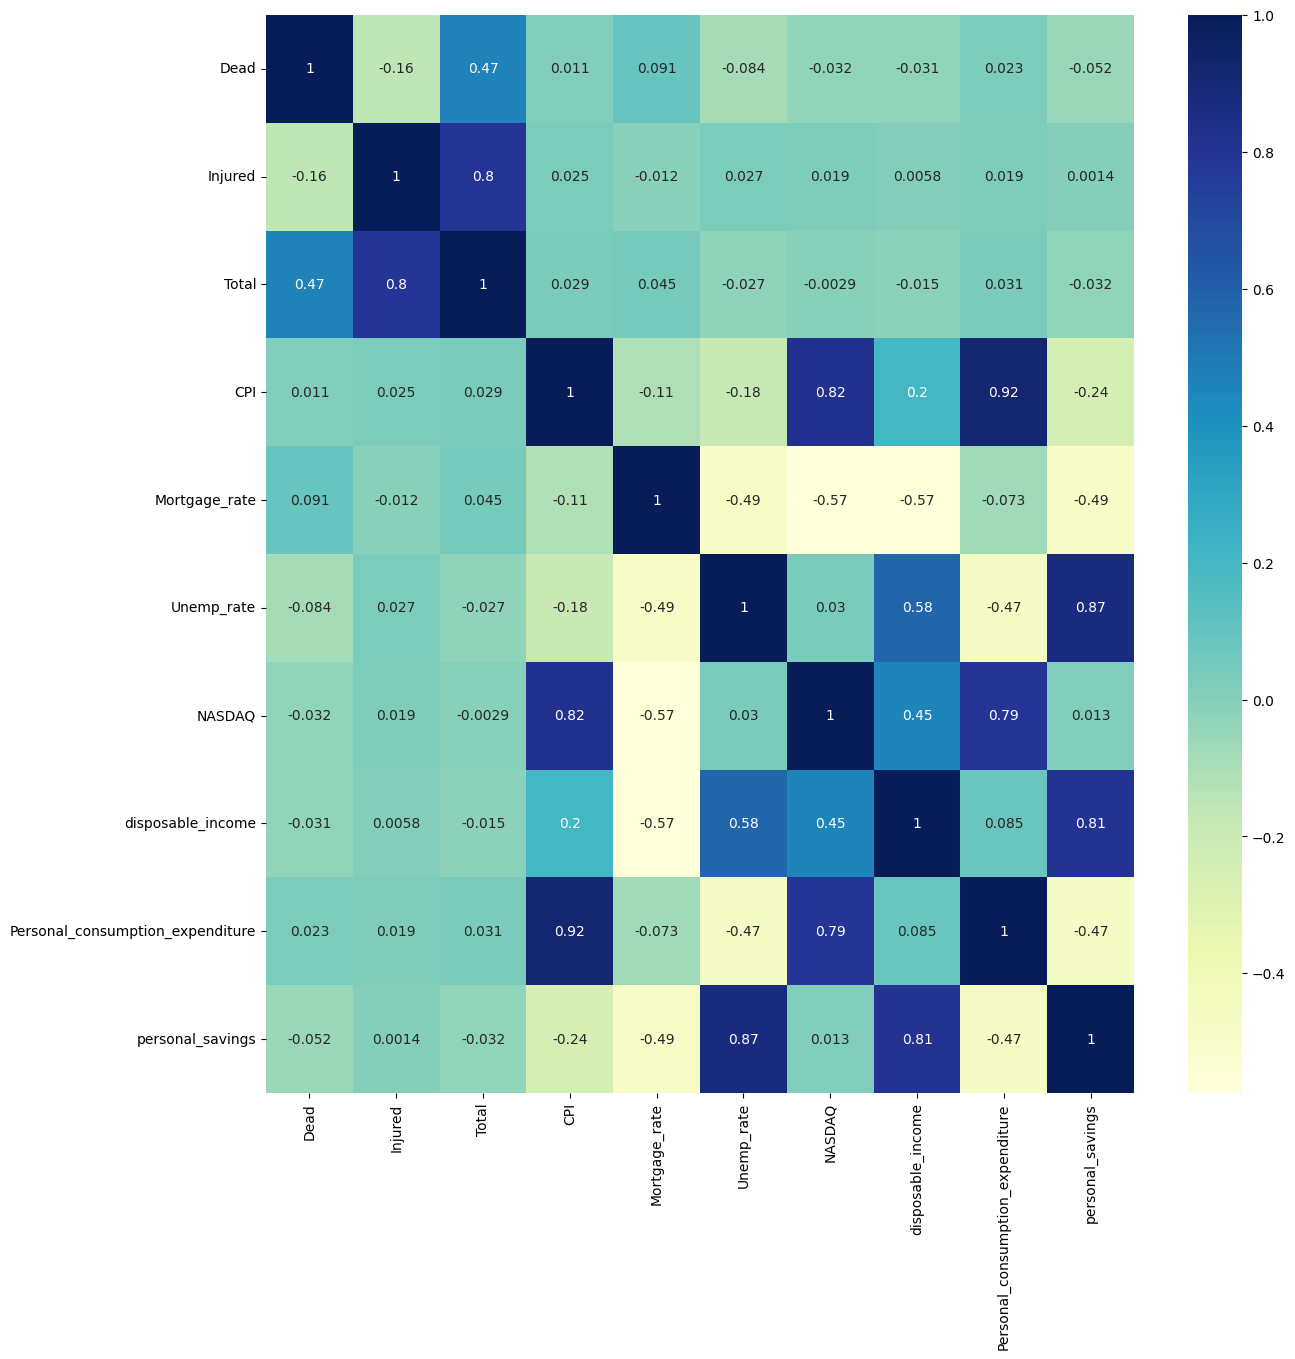

In [155]:
plt.figure(figsize=(14,14))
dataplot = sb.heatmap(df_main.corr(), cmap="YlGnBu", annot=True)